In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from sklearn.metrics import roc_curve, auc, confusion_matrix
import pandas as pd
import seaborn as sns

In [2]:
# Load the training history for each fold
history_fold1 = pd.read_csv("GLCM_Contrast_Result/fold_1_history.csv")  # Replace with actual path
history_fold2 = pd.read_csv("GLCM_Contrast_Result/fold_2_history.csv")  # Replace with actual path
history_fold3 = pd.read_csv("GLCM_Contrast_Result/fold_3_history.csv")  # Replace with actual path
history_fold4 = pd.read_csv("GLCM_Contrast_Result/fold_4_history.csv")  # Replace with actual path
history_fold5 = pd.read_csv("GLCM_Contrast_Result/fold_5_history.csv")  # Replace with actual path
history_fold6 = pd.read_csv("GLCM_Contrast_Result/fold_6_history.csv")  # Replace with actual path
history_fold7 = pd.read_csv("GLCM_Contrast_Result/fold_7_history.csv")  # Replace with actual path
history_fold8 = pd.read_csv("GLCM_Contrast_Result/fold_8_history.csv")  # Replace with actual path
history_fold9 = pd.read_csv("GLCM_Contrast_Result/fold_9_history.csv")  # Replace with actual path
history_fold10 = pd.read_csv("GLCM_Contrast_Result/fold_10_history.csv")  # Replace with actual path

# Load confusion matrix data for each fold
cm_data_fold1 = pd.read_csv("GLCM_Contrast_Result/fold_1_confusion_matrix_data.csv")  # Replace with actual path
cm_data_fold2 = pd.read_csv("GLCM_Contrast_Result/fold_2_confusion_matrix_data.csv")  # Replace with actual path
cm_data_fold3 = pd.read_csv("GLCM_Contrast_Result/fold_3_confusion_matrix_data.csv")  # Replace with actual path
cm_data_fold4 = pd.read_csv("GLCM_Contrast_Result/fold_4_confusion_matrix_data.csv")  # Replace with actual path
cm_data_fold5 = pd.read_csv("GLCM_Contrast_Result/fold_5_confusion_matrix_data.csv")  # Replace with actual path
cm_data_fold6 = pd.read_csv("GLCM_Contrast_Result/fold_6_confusion_matrix_data.csv")  # Replace with actual path
cm_data_fold7 = pd.read_csv("GLCM_Contrast_Result/fold_7_confusion_matrix_data.csv")  # Replace with actual path
cm_data_fold8 = pd.read_csv("GLCM_Contrast_Result/fold_8_confusion_matrix_data.csv")  # Replace with actual path
cm_data_fold9 = pd.read_csv("GLCM_Contrast_Result/fold_9_confusion_matrix_data.csv")  # Replace with actual path
cm_data_fold10 = pd.read_csv("GLCM_Contrast_Result/fold_10_confusion_matrix_data.csv")  # Replace with actual path

# Load the roc_auc values for each fold
with open("GLCM_Contrast_Result/all_val_auc.json", "r") as f:
    all_val_auc = json.load(f)

# load processing_time.txt
with open("GLCM_Contrast_Result/processing_time.txt", "r") as f:
    processing_time = f.read()

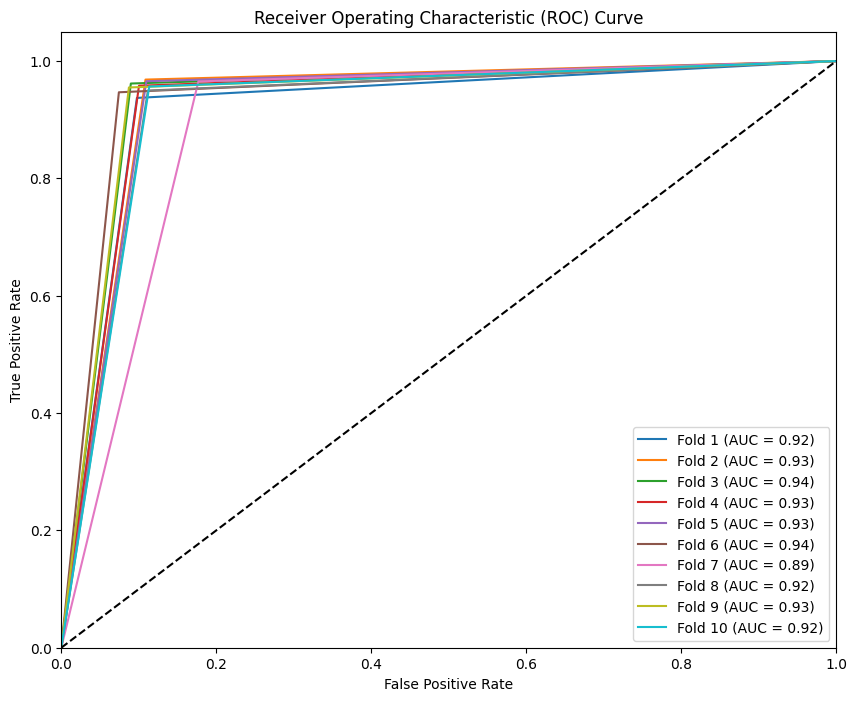

In [3]:
plt.figure(figsize=(10, 8))
for fold in range(10):  # Assuming 10 folds
    # Use the correct confusion matrix data for each fold
    cm_data = pd.read_csv(f"GLCM_Contrast_Result/fold_{fold + 1}_confusion_matrix_data.csv")
    fpr, tpr, _ = roc_curve(cm_data["true_labels"], cm_data["predicted_labels"])  
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Fold {fold + 1} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [4]:
# find the average of the validation AUCs
average_val_auc = np.mean(all_val_auc[0])
print(f"Average validation AUC: {average_val_auc}")

Average validation AUC: 0.9589396807327791


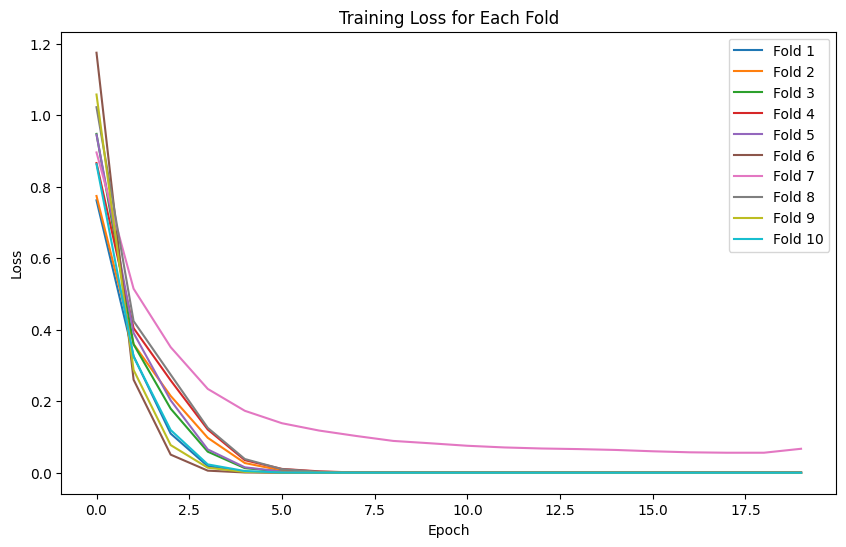

In [5]:
# Plot the training history for each fold
plt.figure(figsize=(10, 6))
plt.plot(history_fold1["train_loss"], label="Fold 1")
plt.plot(history_fold2["train_loss"], label="Fold 2")
plt.plot(history_fold3["train_loss"], label="Fold 3")
plt.plot(history_fold4["train_loss"], label="Fold 4")
plt.plot(history_fold5["train_loss"], label="Fold 5")
plt.plot(history_fold6["train_loss"], label="Fold 6")
plt.plot(history_fold7["train_loss"], label="Fold 7")
plt.plot(history_fold8["train_loss"], label="Fold 8")
plt.plot(history_fold9["train_loss"], label="Fold 9")
plt.plot(history_fold10["train_loss"], label="Fold 10")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss for Each Fold")
plt.legend()
plt.show()

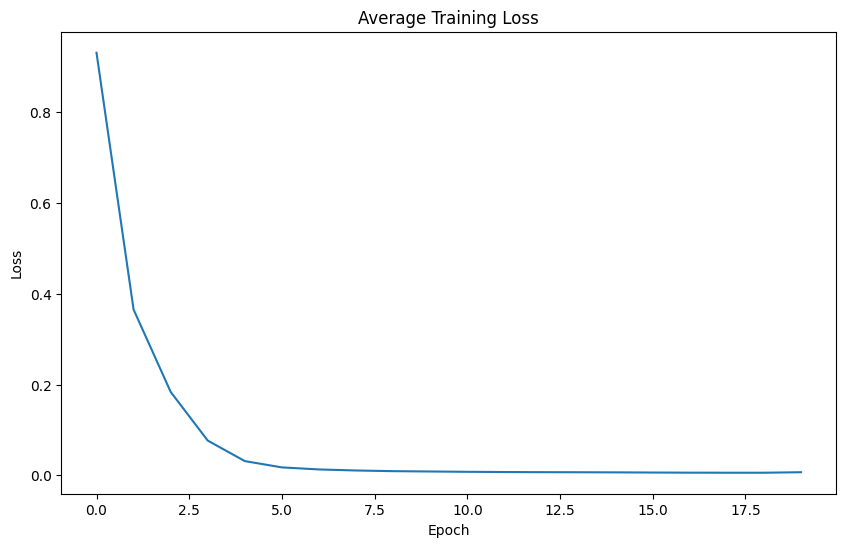

In [6]:
# plot average training loss
train_loss = np.mean([history_fold1["train_loss"], history_fold2["train_loss"], history_fold3["train_loss"],
                      history_fold4["train_loss"], history_fold5["train_loss"], history_fold6["train_loss"],
                      history_fold7["train_loss"], history_fold8["train_loss"], history_fold9["train_loss"],
                      history_fold10["train_loss"]], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(train_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Average Training Loss")
plt.show()

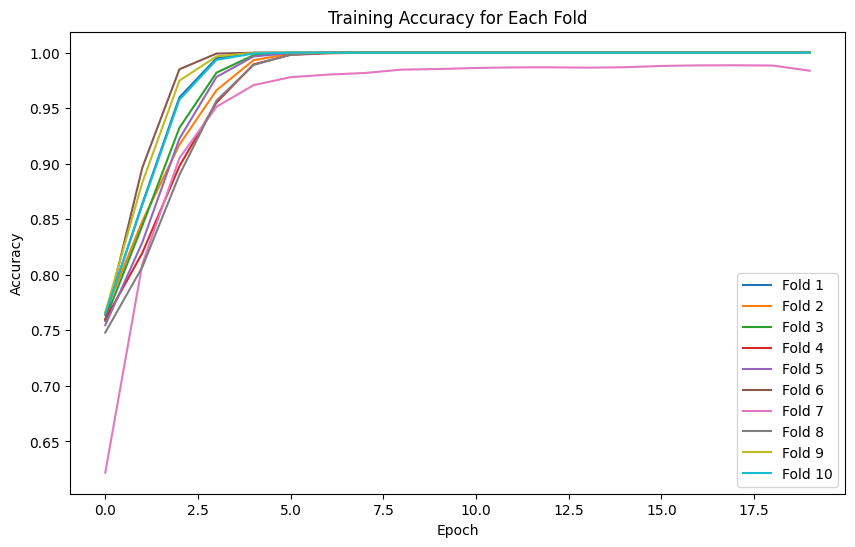

In [7]:
# plot training accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_fold1["train_acc"], label="Fold 1")
plt.plot(history_fold2["train_acc"], label="Fold 2")
plt.plot(history_fold3["train_acc"], label="Fold 3")
plt.plot(history_fold4["train_acc"], label="Fold 4")
plt.plot(history_fold5["train_acc"], label="Fold 5")
plt.plot(history_fold6["train_acc"], label="Fold 6")
plt.plot(history_fold7["train_acc"], label="Fold 7")
plt.plot(history_fold8["train_acc"], label="Fold 8")
plt.plot(history_fold9["train_acc"], label="Fold 9")
plt.plot(history_fold10["train_acc"], label="Fold 10")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy for Each Fold")
plt.legend()
plt.show()

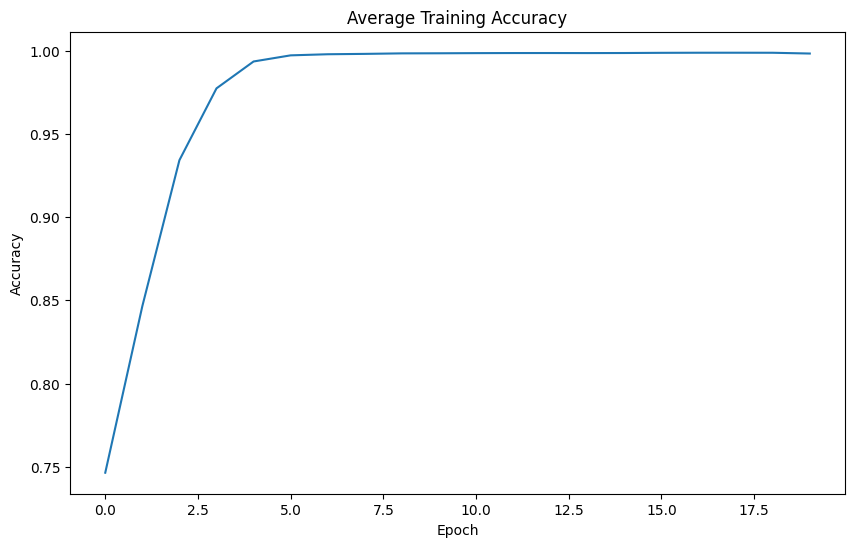

In [8]:
# find average training accuracy
train_acc = np.mean([history_fold1["train_acc"], history_fold2["train_acc"], history_fold3["train_acc"],
                     history_fold4["train_acc"], history_fold5["train_acc"], history_fold6["train_acc"],
                     history_fold7["train_acc"], history_fold8["train_acc"], history_fold9["train_acc"],
                     history_fold10["train_acc"]], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(train_acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Average Training Accuracy")
plt.show()

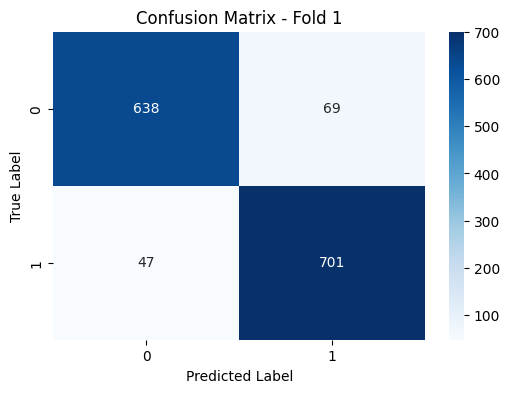

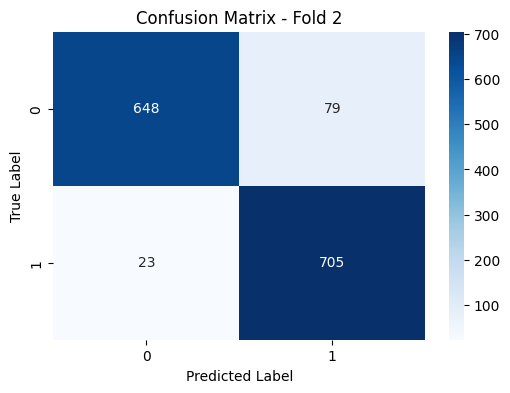

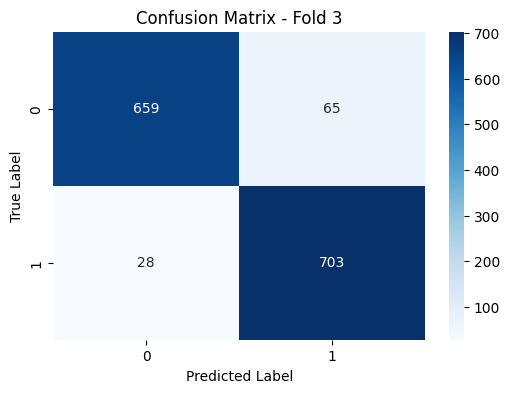

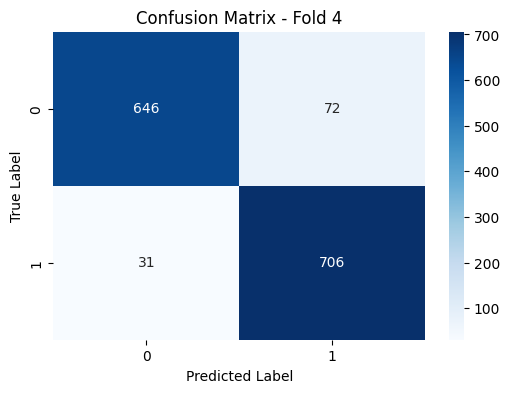

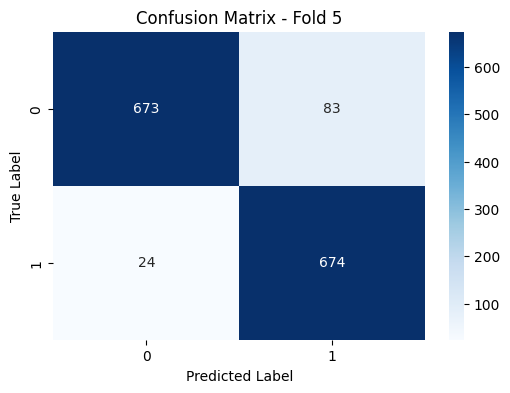

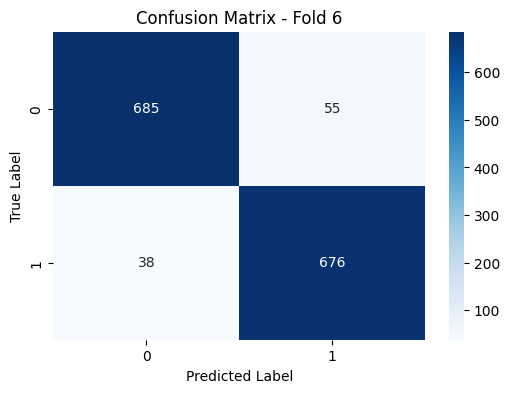

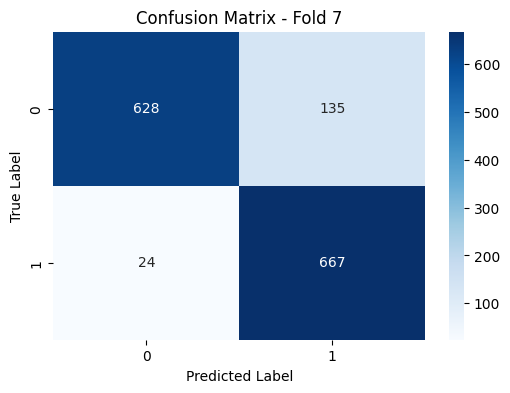

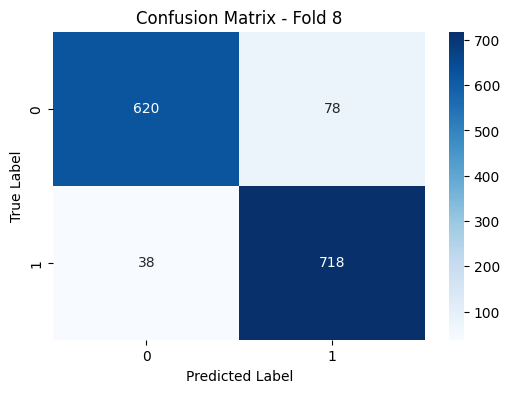

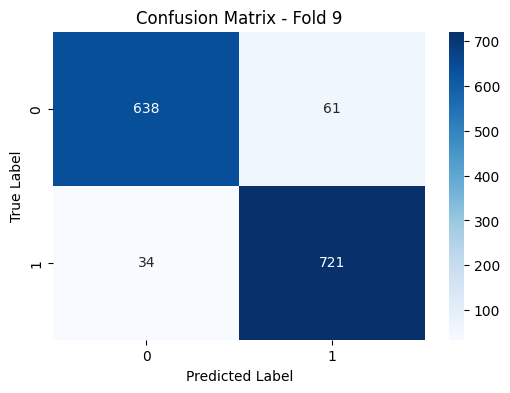

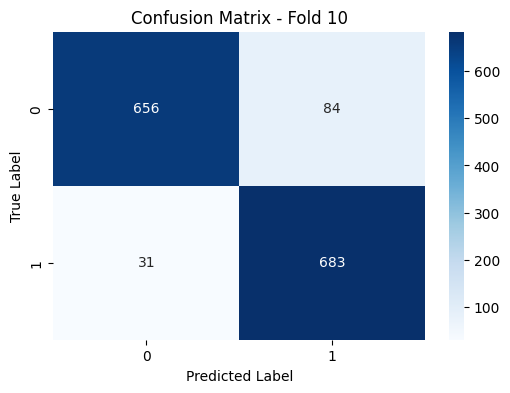

In [9]:
for fold in range(10):
    # Load the confusion matrix data for the current fold
    cm_data = pd.read_csv(f"GLCM_Contrast_Result/fold_{fold + 1}_confusion_matrix_data.csv")
    cm = confusion_matrix(cm_data["true_labels"], cm_data["predicted_labels"])  
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - Fold {fold + 1}")
    plt.show()

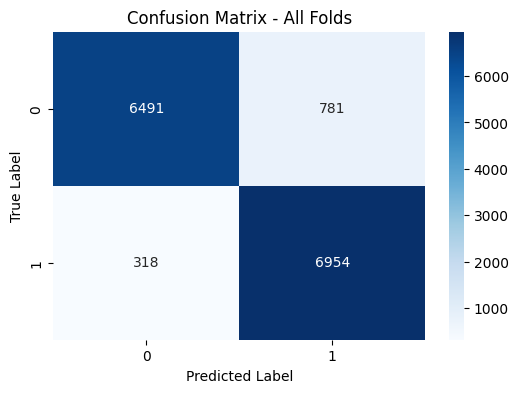

In [10]:
# merge all confusion matrix data and plot in a single confusion matrix
cm_data = pd.concat([cm_data_fold1, cm_data_fold2, cm_data_fold3, cm_data_fold4, cm_data_fold5,
                     cm_data_fold6, cm_data_fold7, cm_data_fold8, cm_data_fold9, cm_data_fold10], ignore_index=True)
cm = confusion_matrix(cm_data["true_labels"], cm_data["predicted_labels"])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - All Folds")
plt.show()

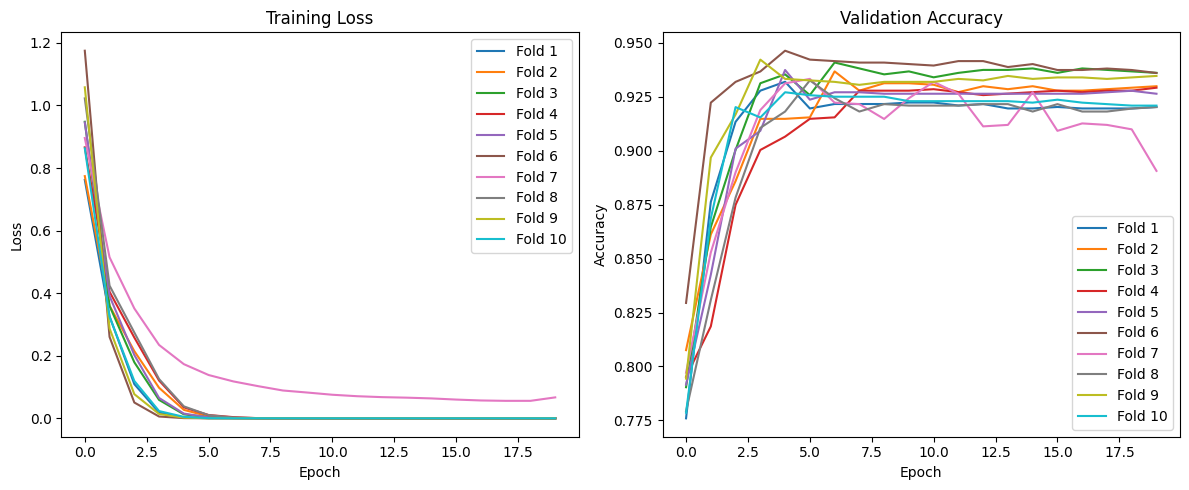

In [11]:
plt.figure(figsize=(12, 5))

# Plot training loss for each fold
plt.subplot(1, 2, 1)
for fold in range(10):
    # Use the correct history data for each fold
    history = pd.read_csv(f"GLCM_Contrast_Result/fold_{fold + 1}_history.csv")
    plt.plot(history["train_loss"], label=f"Fold {fold + 1}")  
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

# Plot validation accuracy for each fold
plt.subplot(1, 2, 2)
for fold in range(10):
    # Use the correct history data for each fold
    history = pd.read_csv(f"GLCM_Contrast_Result/fold_{fold + 1}_history.csv")
    plt.plot(history["val_acc"], label=f"Fold {fold + 1}")  
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

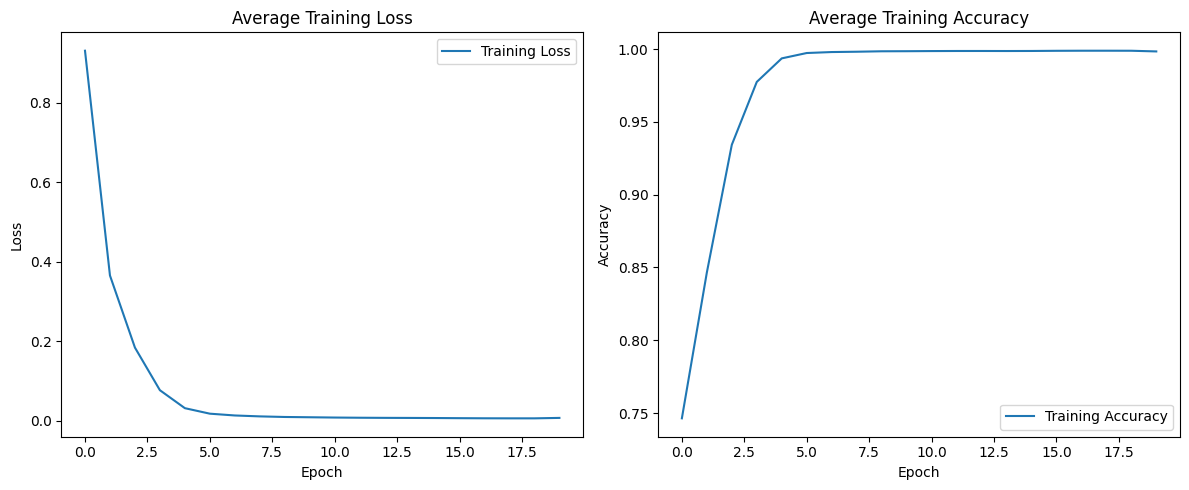

In [12]:
# plot average training history
train_loss = np.mean([history_fold1["train_loss"], history_fold2["train_loss"], history_fold3["train_loss"],
                      history_fold4["train_loss"], history_fold5["train_loss"], history_fold6["train_loss"],
                      history_fold7["train_loss"], history_fold8["train_loss"], history_fold9["train_loss"],
                      history_fold10["train_loss"]], axis=0)
val_loss = np.mean([history_fold1["val_loss"], history_fold2["val_loss"], history_fold3["val_loss"],
                    history_fold4["val_loss"], history_fold5["val_loss"], history_fold6["val_loss"],
                    history_fold7["val_loss"], history_fold8["val_loss"], history_fold9["val_loss"],
                    history_fold10["val_loss"]], axis=0)
train_acc = np.mean([history_fold1["train_acc"], history_fold2["train_acc"], history_fold3["train_acc"],
                     history_fold4["train_acc"], history_fold5["train_acc"], history_fold6["train_acc"],
                     history_fold7["train_acc"], history_fold8["train_acc"], history_fold9["train_acc"],
                     history_fold10["train_acc"]], axis=0)
val_acc = np.mean([history_fold1["val_acc"], history_fold2["val_acc"], history_fold3["val_acc"],
                     history_fold4["val_acc"], history_fold5["val_acc"], history_fold6["val_acc"],
                     history_fold7["val_acc"], history_fold8["val_acc"], history_fold9["val_acc"],
                     history_fold10["val_acc"]], axis=0)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Training Loss")
# plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Average Training Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label="Training Accuracy")
# plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Average Training Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
# Format the content
processing_time_str = processing_time.replace('\t', '')

# Print the formatted result
print(processing_time_str)

fold_1  1002.0621044635773
fold_2  902.6917450428009
fold_3  898.456915140152
fold_4  900.0184869766235
fold_5  986.6831769943237
fold_6  896.5380923748016
fold_7  893.5690703392029
fold_8  895.4279294013977
fold_9  892.8429601192474
fold_10  894.8522820472717
